# Instagram Bot - 2

In [1]:
# Import all required Packages and Libraries
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.select import Select
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
from time import sleep
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import re

In [2]:
# Open the Chrome browser
# Note: My Webdriver is in the same folder as this Jupyter Notebook, If webdriver is installed in some different location use executable_path="PATH"
driver = webdriver.Chrome()

In [3]:
# Maximize the window 
driver.maximize_window()

In [4]:
# Initialize explicit wait for ensuring complete loading of webpages
wait = WebDriverWait(driver,10)

In [5]:
# Home page of Instagram
def goTOHomepage():
    driver.get('https://www.instagram.com/')

In [6]:
username = "SAMPLE_USERNAME"
password = "SAMPLE_PASSWORD"

Login to Instagram

In [9]:
goTOHomepage()

In [10]:
# Function to Login into Instagram Handle
def instaLogin(username,password):
    try:
        # Find Username and Password textbox, then enter username and password
        wait.until(EC.presence_of_element_located((By.NAME,'username'))).send_keys(username)
        wait.until(EC.presence_of_element_located((By.NAME,'password'))).send_keys(password)

        # Locating Login Button then submit it
        wait.until(EC.presence_of_element_located((By.TAG_NAME,'button'))).submit()
        sleep(1)

        # Locating and clicking "Not now" for saving login info
        wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_ac8f'))).click()
        sleep(1)

        # Locating and clicking "Not Now" for Turn on Notification
        wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class="_a9-z"]/button[2]'))).click()

    except TimeoutException:
        print("Something Went Wrong!")

# Main Program
# Call instaLogin Function
instaLogin(username,password)

## Problem 1

Your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.<br>

1. From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

Procedure to complete Task No 1 of Problem 1<br>
1. Search the 'food' string into search textbox and get the URLs of the Instagram handles appeared on search. Store them in a dictionary<br>
2. Go to each Instagram Handle and get their followers in a dictionary<br>
3. Find top 5 Instagram handles out of the follower count dictionary<br>
4. Show the top 5 instagram handle result on a pie chart

In [7]:
goTOHomepage()

In [11]:
# Function to search the given string and return the URLs of top n Insta Handles appeared as results
def search_and_store_handle_links(string,n):
    base_url = 'https://www.instagram.com/'
    user_urls = {}
    try:
        # Locate and Click on Search button
        wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR,"span.x1lliihq.x193iq5w.x6ikm8r.x10wlt62.xlyipyv.xuxw1ft")))[1].click()
        sleep(1)

        # Locating Search TextBox then enter search string
        wait.until(EC.presence_of_element_located((By.XPATH,"//input[@type='text']"))).send_keys(string)
        sleep(1)

        # Find all Search handle
        search_results = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR,'div.x9f619.xjbqb8w.x78zum5.x168nmei.x13lgxp2.x5pf9jr.xo71vjh.x1uhb9sk.x1plvlek.xryxfnj.x1c4vz4f.x2lah0s.x1q0g3np.xqjyukv.x6s0dn4.x1oa3qoh.x1nhvcw1')))
        sleep(1)
        
        # Iterate over search handle and extract the text
        for i in search_results[:n]:
            # print(i.text)
            user_urls[i.text] = base_url + i.text
            # print(user_urls[i.text])

        sleep(5)
        # Clearing search bar
        driver.find_element(By.CLASS_NAME,'_aawn._9-lv').click()

        return user_urls

    except TimeoutException:
        print("Something Went Wrong!")


# search_and_store_handle_links('food',10)

{'foodtalkindia': 'https://www.instagram.com/foodtalkindia',
 'dilsefoodie': 'https://www.instagram.com/dilsefoodie',
 'food_lunatic': 'https://www.instagram.com/food_lunatic',
 'pune_food_blogger': 'https://www.instagram.com/pune_food_blogger',
 'food_travel_etc': 'https://www.instagram.com/food_travel_etc',
 'foodie_vakil': 'https://www.instagram.com/foodie_vakil',
 'food': 'https://www.instagram.com/food',
 'delhifoodie': 'https://www.instagram.com/delhifoodie',
 'foodmapjaipur': 'https://www.instagram.com/foodmapjaipur',
 'foodie_rushil': 'https://www.instagram.com/foodie_rushil'}

In [12]:
# Function to count the followers of given Instagram Handle
def getFollowerCount(insta_url):
    # Open the Instagram Handle
    driver.get(insta_url)
    sleep(2)

    # Locate the followers button
    data = wait.until(EC.presence_of_element_located((By.PARTIAL_LINK_TEXT,'followers')))
    # Store the followers button attributes and find the follower count number
    Follower_count = BeautifulSoup(data.get_attribute('outerHTML'),'html.parser').span['title']
    Follower_count=int(Follower_count.replace(',',''))

    return Follower_count
# getFollowerCount("https://www.instagram.com/foodtalkindia")

309370

In [13]:
# Function to get the followers for all instagram Handles URL
def Count_Followers_of_all_Handles(users_URL):
    # Use a dictionary to store the follower counts of all handles
    Users_Followers = {}

    # Iterate for all insta handle urls
    for userName, url in users_URL.items():
        # Call getFollowerCount function
        followers = getFollowerCount(url)
        sleep(1)
        # Store the follower count corresponding to its username
        Users_Followers[userName] = followers
    
    return Users_Followers
# Count_Followers_of_all_Handles(
# {'foodtalkindia': 'https://www.instagram.com/foodtalkindia',
#  'food_lunatic': 'https://www.instagram.com/food_lunatic',
#  'food_and_makeup_lover': 'https://www.instagram.com/food_and_makeup_lover',
#  'food_travel_etc': 'https://www.instagram.com/food_travel_etc',
#  'foodiesince96': 'https://www.instagram.com/foodiesince96',
#  'dilsefoodie': 'https://www.instagram.com/dilsefoodie',
#  'food': 'https://www.instagram.com/food',
#  'foodbellydelites': 'https://www.instagram.com/foodbellydelites',
#  'foodisnirvana': 'https://www.instagram.com/foodisnirvana',
#  'foodelhi': 'https://www.instagram.com/foodelhi'})

{'foodtalkindia': 309370,
 'food_lunatic': 222272,
 'food_and_makeup_lover': 13527,
 'food_travel_etc': 216787,
 'foodiesince96': 330945,
 'dilsefoodie': 1195154,
 'food': 181635,
 'foodbellydelites': 6944,
 'foodisnirvana': 19758,
 'foodelhi': 212704}

In [14]:
# Function to find top 5 Instagram handles by their follower count
def top5Handles(instaFollowers):

    # Create a list of keys sorted by their associated values in descending order
    sorted_handles = sorted(instaFollowers, key=instaFollowers.get, reverse=True)

    # Take the top 5 handles from the sorted list and create a new dictionary
    top5_dict = {userName: instaFollowers[userName] for userName in sorted_handles[:5]}

    return top5_dict

# instaFollowers = {'foodtalkindia': 309393, 'food_lunatic': 222115, 'foodisnirvana': 19761, 'food_travel_etc': 217798, 'food_and_makeup_lover': 13526, 'foodtalk_chennai': 118545, 'food': 181845, 'dilsefoodie': 1195045, 'foodiesince96': 330767, 'foodelhi': 212431}
# top5Handles(instaFollowers)

{'dilsefoodie': 1195045,
 'foodiesince96': 330767,
 'foodtalkindia': 309393,
 'food_lunatic': 222115,
 'food_travel_etc': 217798}

In [15]:
# Main Function to find the top 5 Instagram Handles based on followers count when searched for a string

# Find top 10 results on searching 'food' and store the Url of their Insta Handle
string = 'food' # Search for 'food'
n = 10          # get top 10 results

# Get top 10 insta handle urls
top10_insta_handle_urls = search_and_store_handle_links(string,n)

# Go to these handles and get the followers for top 10 results
insta_handles_followers = Count_Followers_of_all_Handles(top10_insta_handle_urls)

# Get top 5 insta handles 
top5_insta_handles = top5Handles(insta_handles_followers)
print(top5_insta_handles)

{'dilsefoodie': 1195154, 'foodtalkindia': 309370, 'food_lunatic': 222277, 'food_travel_etc': 216786, 'pune_food_blogger': 214604}


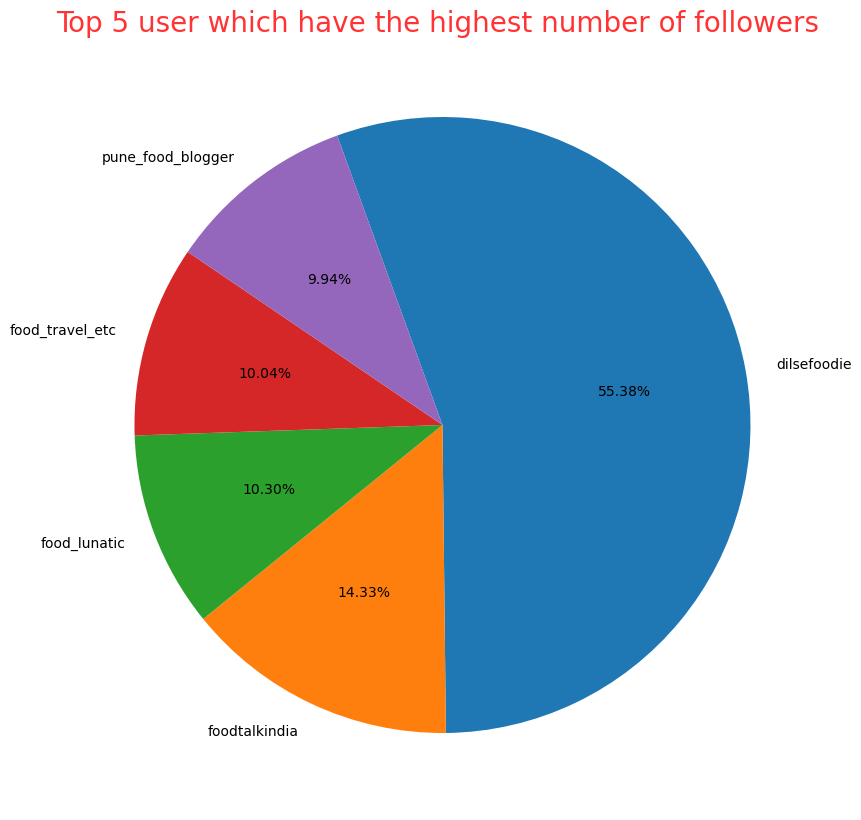

In [16]:
# Now display the results in a pie graph

# Store Follower count
count = list(top5_insta_handles.values())
# Store username of their insta handles
userId = list(top5_insta_handles.keys())


plt.figure(figsize=(10,10))
plt.pie(count,labels=userId,autopct="%.2f%%",counterclock=False,startangle=110)
plt.title('Top 5 user which have the highest number of followers ',fontsize=20, color='red',alpha=0.8)
plt.show()

2. Now Find the number of posts these handles have done in the previous 3 days.

Procedure to complete Task No 2 of Problem 1<br>
1. Get the URL of top 5 Instagram handles<br>
2. Get the no of posts for top 5 instagram handles in last 3 days.<br>
3. results on a Bar Graph

In [17]:
# Function to get no of posts from a Insta Handle in the given no of days
def get_no_of_posts(user_url,No_of_Days):
    driver.get(user_url)
    sleep(2)
    
    # Open the First post
    wait.until(EC.presence_of_element_located((By.CSS_SELECTOR,'div._aabd._aa8k._al3l'))).click()
    # Counter for no of posts
    count = 0
    while True:
        # Get time of first post
        time_of_post = wait.until(EC.presence_of_element_located((By.XPATH,'//time[@class="_aaqe"]'))).get_attribute('datetime')
        # Convert time in no of days
        date_of_post = datetime.strptime(time_of_post[0:19], "%Y-%m-%dT%H:%M:%S")
        # Check if date of post is in the past 3 days or not by finding the difference of current date and date of post
        if (datetime.now() - date_of_post).days > No_of_Days :
            # If not within last 3 days break
            break
        else :
            # Within last 3 days then update the counter
            count += 1

        # Go to the next post by locating and clicking the next button
        Next_post = wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class=" _aaqg _aaqh"]/button')))
        Next_post.click()
        sleep(2)

    driver.back()
    return count

In [18]:
goTOHomepage()

In [19]:
# Function to get the urls of top 5 insta handles
def get_url_of_top_5_handles(top5_insta_handles):
    # Link of the base instagram URL
    base_url = 'https://www.instagram.com/'

    # Dictionary to store the url of corresponding instagram handle
    insta_urls = {}

    for username in top5_insta_handles:
        # Instagram handle url = Base Url + username of Instagram handle
        insta_urls[username] = base_url + username

    return insta_urls

In [20]:
# Main Program to find the no of posts in 3 days for top 5 insta handles

# Get url of top 5 insta handles
top_5_insta_urls = get_url_of_top_5_handles(top5_insta_handles)

# For counting the post in last n days
n = 3
no_of_posts = {}

for username in top_5_insta_urls:
    # Get Url of a single insta handle
    user_url = top_5_insta_urls[username]
    # Get no of posts by calling function n times for no of days
    post_Count = get_no_of_posts(user_url,n)
    # Store the result in no_of_post dictionary
    no_of_posts[username] = post_Count

# print no of post of top 5 insta handles in 3 days
no_of_posts

{'dilsefoodie': 0,
 'foodtalkindia': 4,
 'food_lunatic': 4,
 'food_travel_etc': 0,
 'pune_food_blogger': 4}

3. Depict this information using a suitable graph.

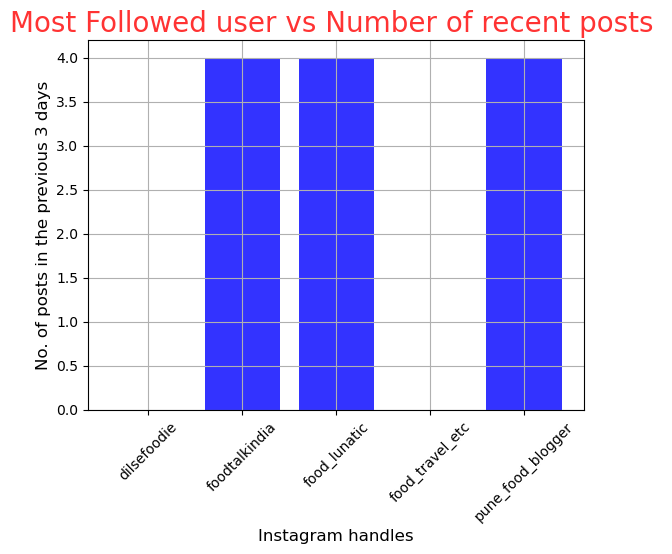

In [21]:
# Get the Insta usernames on X axis
x_axis = no_of_posts.keys()
# Get the no of post in last 3 days of corresponding Insta handles on Y axis
y_axis = no_of_posts.values()

plt.bar(x_axis,y_axis,color='b',alpha=0.8)
plt.ylabel("No. of posts in the previous 3 days",size=12)
plt.xlabel("Instagram handles",size=12)
plt.xticks(rotation = 45)
plt.title('Most Followed user vs Number of recent posts ',fontsize=20, color='red',alpha=0.8)
plt.grid()
plt.show()

## Problem 2

Your friend also needs a list of hashtags that he should use in his posts.

1. Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

Procedure to complete Task No 1 of Problem 2<br>
1. Create a funtion to scrape the word list from the desscription of Instagram handle for 10 posts<br>
2. Go to each Instagram Handle and get their word list and store it in a new list by iteration over the function<br>

In [22]:
goTOHomepage()

In [24]:
# Function to Scrape the content of a given Instagram handle from n no of posts
def content_of_post(user_url,No_of_post):
    # Word list to store the words
    word_list = []

    # Go to the Instagram handle page
    driver.get(user_url)
    sleep(5)

    # Locate and click on the first post
    wait.until(EC.presence_of_element_located((By.CSS_SELECTOR,'div._aabd._aa8k._al3l'))).click()
    sleep(1)

    # Counter to count the no of posts
    count = 1

    while True:
        # Check if post no is equal to counter or not 
        if No_of_post == count:
            break

        # Locate the div tag of the description of the post
        div = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_a9zs')))

        # Get the description in a variable
        contents = BeautifulSoup(div.get_attribute('innerHTML'),'html.parser').text

        # Use re library to find the words and hashtags from contents variables
        results = re.findall(r'(#\w+|\b\w+\b)', contents)

        # Extenf the results in the word_list
        word_list.extend(results)

        # Increment the counter
        count += 1
    
        # Go to the next post by locating and clicking the next button
        wait.until(EC.presence_of_element_located((By.CSS_SELECTOR,"div._aaqg._aaqh"))).click()
        sleep(1)

    driver.back()
    return word_list
    
# content_of_post('https://www.instagram.com/foodtalkindia',10)

['At',
 'galaxypizza',
 'in',
 'they',
 'serve',
 'New',
 'York',
 'style',
 'pizzas',
 'that',
 'are',
 'simple',
 'yet',
 'extraordinary',
 'Their',
 'pizzas',
 'are',
 'all',
 'about',
 'using',
 'fresh',
 'and',
 'high',
 'quality',
 'ingredients',
 'The',
 'crust',
 'is',
 'both',
 'chewy',
 'and',
 'full',
 'of',
 'flavor',
 'the',
 'sauce',
 'is',
 'fresh',
 'and',
 'lively',
 'and',
 'the',
 'toppings',
 'are',
 'generously',
 'satisfying',
 'What',
 'makes',
 'them',
 'special',
 'is',
 'our',
 'unique',
 'New',
 'York',
 'Style',
 'crust',
 'This',
 'is',
 'for',
 'people',
 'who',
 'like',
 'crispier',
 'chewier',
 'crusts',
 'and',
 'breads',
 'like',
 'Sourdough',
 'They',
 'have',
 'a',
 'wide',
 'range',
 'of',
 'gourmet',
 'pizzas',
 'that',
 'are',
 'delicious',
 'unique',
 'takes',
 'on',
 'both',
 'classics',
 'and',
 'innovations',
 'Order',
 'now',
 'from',
 'their',
 'outlets',
 'in',
 'Lajpat',
 'or',
 'Gurugram',
 'Winter',
 'festivities',
 'are',
 'knocking',
 

In [25]:
# Extract the word list for top 5 insta handles

# Get url of top 5 insta handles
top_5_insta_urls = get_url_of_top_5_handles(top5_insta_handles)

# List to store the words of all all insta handles
words_of_5_users = []

# Iterate over the instagram url dictionary
for Id in top_5_insta_urls:
    # Get Url of the insta handle
    user_url = top_5_insta_urls[Id]

    # Call function to get word list for that insta handle
    text_list = content_of_post(user_url,10)

    # Extend the word list in words_of_5_users list
    words_of_5_users.extend(text_list)

    # Print the result for all insta handles
    print(Id,'->',text_list)
    print()

dilsefoodie -> ['#Ad', 'Garmi', 'ka', 'Mausam', 'aa', 'gaya', 'hai', 'toh', 'matlab', 'naya', 'ice', 'cream', 'flavour', 'toh', 'try', 'karna', 'chahiye', 'Tried', 'the', 'kwalitywalls', 'new', 'Hazelnut', 'Chocolate', 'Ice', 'cream', 'and', 'it', 'has', 'just', 'the', 'right', 'amount', 'of', 'sweetness', 'Go', 'check', 'it', 'out', 'Order', 'yours', 'on', 'Swiggy', 'or', 'get', 'it', 'from', 'your', 'nearest', 'Kwality', 'Wall', 's', 'freezer', '#CraftedForIndulgence', '#IceCream', '#Hazelnuts', '#Chocolate', '#hazelnutchocolate', '#dilsefoodie', '24', 'Haree', 'Mirch', 'And', '15', 'Nimbu', 'Daal', 'Ke', 'Banaye', 'Hai', 'Chacha', 'Bhatija', 'Special', 'Chole', 'Kulche', 'Thanks', 'To', 'agraeaters', 'For', 'Helping', 'Us', 'Exploring', 'Agra', 'Street', 'Food', '#dilsefoodie', '#food', '#streetfood', '#cholekulche', 'On', 'The', 'Occasion', 'Of', '75th', 'Independence', 'Day', 'ministryofculturegoi', 'Awarded', 'Us', 'As', 'One', 'Of', '75', 'Cultural', 'Brand', 'Ambassador', 'Of',

2.Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

Procedure to complete Task No 2 of Problem 2<br>
1. Calculate the word frequency by using a dictionary and store it

In [26]:
# Function to calculate the freq of words 
def get_word_frequency(List_of_words):
    # Use dictionary to find and store frequency of words
    dct = {}
    for word in List_of_words:
        # Check if the word is present in dictionary...if not add one...if present then increase its frequency count
        dct[word] = dct.get(word,0) + 1
    return dct

word_freq_dict = get_word_frequency(words_of_5_users)
word_freq_dict

{'#Ad': 1,
 'Garmi': 1,
 'ka': 2,
 'Mausam': 1,
 'aa': 1,
 'gaya': 1,
 'hai': 1,
 'toh': 2,
 'matlab': 1,
 'naya': 1,
 'ice': 2,
 'cream': 4,
 'flavour': 1,
 'try': 1,
 'karna': 1,
 'chahiye': 1,
 'Tried': 1,
 'the': 74,
 'kwalitywalls': 1,
 'new': 2,
 'Hazelnut': 1,
 'Chocolate': 1,
 'Ice': 1,
 'and': 62,
 'it': 18,
 'has': 1,
 'just': 8,
 'right': 3,
 'amount': 1,
 'of': 48,
 'sweetness': 1,
 'Go': 1,
 'check': 2,
 'out': 3,
 'Order': 2,
 'yours': 1,
 'on': 18,
 'Swiggy': 1,
 'or': 4,
 'get': 4,
 'from': 10,
 'your': 12,
 'nearest': 2,
 'Kwality': 1,
 'Wall': 1,
 's': 14,
 'freezer': 1,
 '#CraftedForIndulgence': 1,
 '#IceCream': 1,
 '#Hazelnuts': 1,
 '#Chocolate': 1,
 '#hazelnutchocolate': 1,
 '#dilsefoodie': 9,
 '24': 2,
 'Haree': 1,
 'Mirch': 1,
 'And': 4,
 '15': 1,
 'Nimbu': 1,
 'Daal': 1,
 'Ke': 5,
 'Banaye': 1,
 'Hai': 1,
 'Chacha': 1,
 'Bhatija': 1,
 'Special': 2,
 'Chole': 4,
 'Kulche': 2,
 'Thanks': 1,
 'To': 3,
 'agraeaters': 1,
 'For': 1,
 'Helping': 1,
 'Us': 2,
 'Explorin

3. Create a csv file with two columns : the word and its frequency

Procedure to complete Task No 3 of Problem 2<br>
1. Get the frequency dictionary from task 2 and use it create a data frame<br>
2. Use columns - Words and Frequency for storing the data <br>
3. Convert data frame into csv file

In [27]:
# Store the words in a list
words = [ key for key,value in word_freq_dict.items()]

# Store their freq in another list
word_frequency = [ value for key,value in word_freq_dict.items()]

# columns : the word and its frequency
columns = {"Word":words,"Frequency":word_frequency}

# Create the pandas dataframe for this column using words and frq list
df = pd.DataFrame(columns)
print(df.head(10))
# using .to_csv pandas function to convert dataframe to csv without Index values
df.to_csv('words_frequency.csv',index=False)


     Word  Frequency
0     #Ad          1
1   Garmi          1
2      ka          2
3  Mausam          1
4      aa          1
5    gaya          1
6     hai          1
7     toh          2
8  matlab          1
9    naya          1


4. Now, find the hashtags that were most popular among these bloggers

Procedure to complete Task No 4 of Problem 2<br>
1. Filter the dictionary for only hashtags<br>
2. Create data frame and sort the data into descending order<br>
3. Use columns - Words and Frequency for storing the data <br>
4. Convert data frame into csv file

In [28]:
# Filter the hashtag by checking if the words starts with # and store it in hashtags dict
hashtags = {key: value for key, value in word_freq_dict.items() if key.startswith('#')}

hashtags_list = list(hashtags.keys())
hashtags_frequency = list(hashtags.values())

# Create a dictionary with columns
columns = {"Hashtag": hashtags_list, "Frequency": hashtags_frequency}

# Create the pandas dataframe for hashtags
df_hashtags = pd.DataFrame(columns)

# Sort the dataframe in decreasing order based on the 'Frequency' column
df_hashtags_sorted = df_hashtags.sort_values(by='Frequency', ascending=False)

# Save the DataFrame to a CSV file
df_hashtags_sorted.to_csv('hashtags_frequency.csv', index=False)

df_hashtags_sorted

,Hashtag,Frequency
154,#punefoodblogger,9
6,#dilsefoodie,9
7,#food,9
155,#pune,8
66,#travel,6
...,...,...
70,#himachal,1
71,#iias,1
72,#outfitsiwore,1
74,#ethnic,1


5. Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

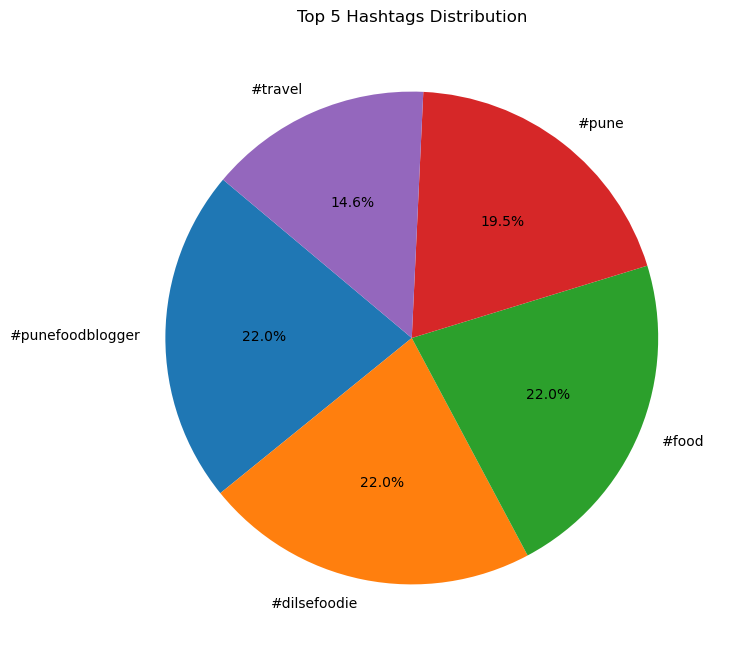

In [29]:
# Select the top 5 rows from the sorted DataFrame
top5_hashtags = df_hashtags_sorted.head(5)

# Plotting the Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(top5_hashtags['Frequency'], labels=top5_hashtags['Hashtag'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Hashtags Distribution')
plt.show()


## Problem 3

You need to also calculate average followers : likes ratio for the obtained handles. Followers : Likes ratio is calculated as follows:

1. Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [30]:
# Function to Get total like of all n no of post of a given Instagram Handle
def Likes_of_post(user_url,No_of_post):
    # Go to insta handle page
    driver.get(user_url)
    sleep(5)
    # Use total likes counter to store the total likes
    Total_Likes = 0

    # Locate and click on the first post
    wait.until(EC.presence_of_element_located((By.CSS_SELECTOR,'div._aabd._aa8k._al3l'))).click()
    sleep(1)
    # Counter to count the no of posts
    count = 1
    
    # Iterate for given no of posts
    while True:
        # Check if no of post are equal to req no
        if No_of_post == count:
            break
        
        # Locate the section tag for like division
        HTML = wait.until(EC.presence_of_element_located((By.XPATH,'//section[@class="_ae5m _ae5n _ae5o"]')))
        # store its content of last span tag in Likes variable 
        Likes = BeautifulSoup(HTML.get_attribute('innerHTML'),'html.parser').find_all('span')[-1]
        # Find the likes in integer ignoring the commas
        Likes = int(Likes.text.replace(',',''))
        # Add the likes to total likes
        Total_Likes += Likes
        # Increment the counter
        count += 1

        # Locate and click on next post button
        wait.until(EC.presence_of_element_located((By.CSS_SELECTOR,"div._aaqg._aaqh"))).click()
        sleep(2)        
    
    driver.back()
    return Total_Likes


# iterate over top 5 user handle and put profile link in function
print("---------------------------------")
print("Total Likes for 10 Posts")
print("---------------------------------")
Total_likes_of_user = {}
# Iterate for top 5 insta handles
for Id in top_5_insta_urls:
    # Get url
    user_url = top_5_insta_urls[Id]

    # Call Likes_of_post function and store it in total likes
    Total_Likes = Likes_of_post(user_url,10)

    # Store the total likes for 10 posts in a dict
    Total_likes_of_user[Id] = Total_Likes

    # Print the result
    print(Id,'--->',Total_Likes)
    print()

---------------------------------
Total Likes for 10 Posts
---------------------------------
dilsefoodie ---> 555581

foodtalkindia ---> 581

food_lunatic ---> 12830

food_travel_etc ---> 62997

pune_food_blogger ---> 20386



2. Calculate the average likes for a handle.

In [31]:
# Function to find the avg like per post 
def get_avg_likes(Total_Likes,Number_of_Post):
    # Avg likes = total likes divided by no of posts
    avg_likes = Total_Likes / Number_of_Post
    return avg_likes

# calculating avarge likes for 5 handles for 10 posts and store the result in list
print("---------------------------------")
print("Average Likes")
print("---------------------------------")
average_likes_dict={}
# Iterate for top 5 insta handles
for Id,Total_Likes in Total_likes_of_user.items():
    # CAll get avg function
    avg_likes = get_avg_likes(Total_Likes,10)
    # Store it in dict
    average_likes_dict[Id]=avg_likes
    # print the result
    print(Id,'---->',format(avg_likes,'.0f'))


---------------------------------
Average Likes
---------------------------------
dilsefoodie ----> 55558
foodtalkindia ----> 58
food_lunatic ----> 1283
food_travel_etc ----> 6300
pune_food_blogger ----> 2039


3. Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [32]:
print("---------------------------------")
print("Ratio Avg Followers : Avg Likes")
print("---------------------------------")
avg_followers = {}
for ID in top5_insta_handles:
    avg_followers_count = int(top5_insta_handles[ID]/average_likes_dict[ID])
    avg_followers[ID]=avg_followers_count
    print(ID,'---->',avg_followers_count,':',int(average_likes_dict[ID]))

---------------------------------
Ratio Avg Followers : Avg Likes
---------------------------------
dilsefoodie ----> 21 : 55558
foodtalkindia ----> 5324 : 58
food_lunatic ----> 173 : 1283
food_travel_etc ----> 34 : 6299
pune_food_blogger ----> 105 : 2038


4. Create a bar graph to depict the above obtained information.

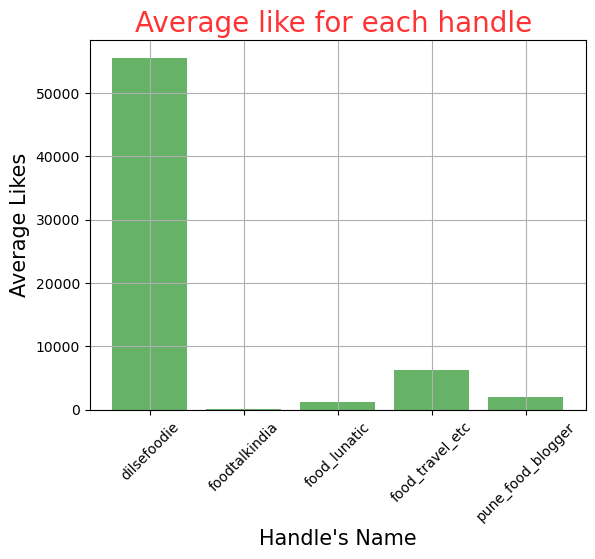

In [37]:
#Plotting Bar Graph for average likes of each handle
#for this I will use answer of problem 3.2 
username = list(average_likes_dict.keys())
avg_like = list(average_likes_dict.values())

plt.bar(username,avg_like,color='g',alpha=0.6)
plt.ylabel("Average Likes",size=15)
plt.xlabel("Handle's Name",size=15)
plt.xticks(rotation = 45)
plt.title('Average like for each handle ',fontsize=20, color='red',alpha=0.8)
plt.grid()
plt.show()

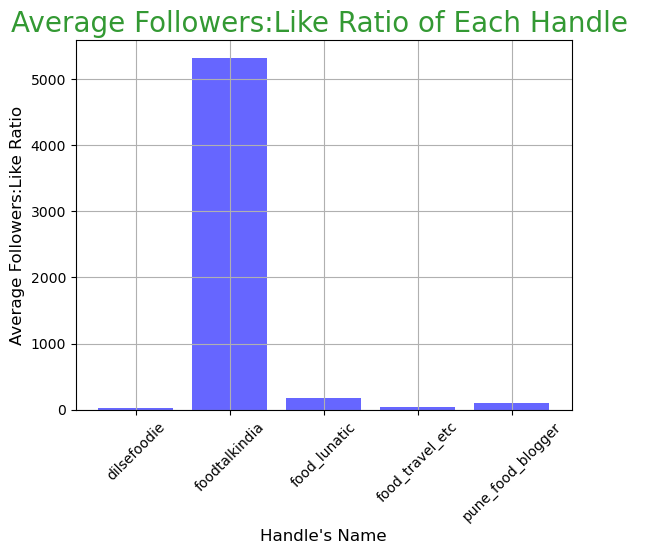

In [36]:
# Plotting Bar Graph for average followers:like ratio of each handle
#For this I will use answer of problem 3.3
username = list(avg_followers.keys())
avg_like = list(avg_followers.values())

plt.bar(username,avg_like,color='Blue',alpha=0.6)
plt.ylabel("Average Followers:Like Ratio",size=12)
plt.xlabel("Handle's Name",size=12)
plt.xticks(rotation = 45)
plt.title('Average Followers:Like Ratio of Each Handle ',fontsize=20, color='Green',alpha=0.8)
plt.grid()
plt.show()

In [71]:
driver.close()